In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset heart.csv
df=pd.read_csv("dementia_dataset.csv")
#to display first 5 records
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
#to check null values
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

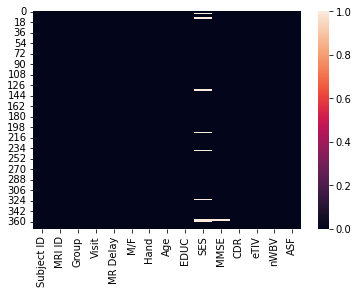

In [5]:
#visualize
sns.heatmap(df.isnull())
plt.show()

In [6]:
df[['SES','MMSE']].dropna(inplace=True)

In [7]:
df=df.dropna()

In [8]:
#to check null values
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
#to check datatypes
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [10]:
#to check duplicates
df.duplicated().sum()

0

In [11]:
#split dataset heart into 2 part
#first part hold all numeric type data
#second part hold all object type data
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [12]:
df_num.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [13]:
df_cat.head()

,Subject ID,MRI ID,Group,M/F,Hand
0,OAS2_0001,OAS2_0001_MR1,Nondemented,M,R
1,OAS2_0001,OAS2_0001_MR2,Nondemented,M,R
5,OAS2_0004,OAS2_0004_MR1,Nondemented,F,R
6,OAS2_0004,OAS2_0004_MR2,Nondemented,F,R
7,OAS2_0005,OAS2_0005_MR1,Nondemented,M,R


In [14]:
df_num.dtypes

Visit         int64
MR Delay      int64
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [15]:
df_cat.dtypes

Subject ID    object
MRI ID        object
Group         object
M/F           object
Hand          object
dtype: object

In [16]:
# using labelencoder  to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [17]:
columns=df_cat.columns
columns

Index(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand'], dtype='object')

In [18]:
for col in columns:
    #creating object of labelencoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

,Subject ID,MRI ID,Group,M/F,Hand
0,0,0,2,1,0
1,0,1,2,1,0
5,1,2,2,0,0
6,1,3,2,0,0
7,2,4,2,1,0


In [20]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Subject ID,MRI ID,Group,M/F,Hand
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,2,1,0
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,1,2,1,0
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,1,2,2,0,0
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,1,3,2,0,0
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,2,4,2,1,0


In [21]:
df_new.duplicated().sum()

0

In [22]:
df_new.dtypes

Visit           int64
MR Delay        int64
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Subject ID      int32
MRI ID          int32
Group           int32
M/F             int32
Hand            int32
dtype: object

In [23]:
X=df_new.drop('ASF',axis=1)
Y=df_new['Group']

In [24]:
X.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Subject ID,MRI ID,Group,M/F,Hand
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0,0,2,1,0
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0,1,2,1,0
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1,2,2,0,0
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1,3,2,0,0
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,2,4,2,1,0


In [25]:
Y.value_counts()

2    190
1    127
0     37
Name: Group, dtype: int64

###   train_test_split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
def create_model(model):
    model.fit(X_train,Y_train)  #for training the model
    Y_pred=model.predict(X_test)  #for testing the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    

In [31]:
# perform logistics
from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression
lr=LogisticRegression()

In [32]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


In [36]:
#show the information gain of allinpit feature
#  IG=dt.feature_importances_ #featuee importance inbuilt method of Decisiom Tre classfifer

# print('information Gain :',IG)

In [38]:
#create dictionary
# dict={'input':X.columns,'IG':IG}
# df1=pd.DataFrame(dict)
# df1
# df1.sort_values('IG',ascending=False )#descending order according to iG

In [39]:
# perform decision tree with pruning technique
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)  #bydefault ginny index
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


In [40]:
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')  #bydefault ginny index
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


In [41]:
# perform decision tree using 2nd pruning technique
#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45
##create object of DecisionTreeClassifier class
#leaf node means no child

#for i in range(45,101,5):
    #print("min sample leaf: ",i)
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)  #ginny index
#call function
dt3=create_model(dt3)
#2nd purning technique : min_samples_leaf

#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45
##create object of DecisionTreeClassifier class
#leaf node means no child

#for i in range(45,101,5):
    #print("min sample leaf: ",i)
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)  #ginny index
#call function
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.19      0.86      0.31         7
           1       0.95      0.42      0.58        45
           2       1.00      1.00      1.00        55

    accuracy                           0.75       107
   macro avg       0.71      0.76      0.63       107
weighted avg       0.93      0.75      0.78       107

[[ 6  1  0]
 [26 19  0]
 [ 0  0 55]]
              precision    recall  f1-score   support

           0       0.19      0.86      0.31         7
           1       0.95      0.42      0.58        45
           2       1.00      1.00      1.00        55

    accuracy                           0.75       107
   macro avg       0.71      0.76      0.63       107
weighted avg       0.93      0.75      0.78       107

[[ 6  1  0]
 [26 19  0]
 [ 0  0 55]]


In [42]:
#for i in range(45,101,5):
    #print("min sample leaf: ",i)
dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')  #entropy
#call function
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.19      0.86      0.31         7
           1       0.95      0.42      0.58        45
           2       1.00      1.00      1.00        55

    accuracy                           0.75       107
   macro avg       0.71      0.76      0.63       107
weighted avg       0.93      0.75      0.78       107

[[ 6  1  0]
 [26 19  0]
 [ 0  0 55]]


###  random forest 

In [43]:
X.shape

(354, 14)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#create  object of Random forest Tree 
for i in range(45,101,5):
    rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1)
    #bydefault gini
    #call the function
    print("NO of Dicision Tree : ",i)
    rfc=create_model(rfc)
    #here n_estimators means take how many no. of decisiontree 
#max_features means take how many input

NO of Dicision Tree :  45
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]
NO of Dicision Tree :  50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]
NO of Dicision Tree :  55
              precision    recall  f1-score   support

           0       1.00      1.

In [46]:
#create  object of Random forest Tree 
for i in range(45,101,5):
    rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1,criterion='entropy')
    #bydefault gini
    #call the function
    print("NO of Dicision Tree : ",i)
    rfc=create_model(rfc)
    #here n_estimators means take how many no. of decisiontree 
#max_features means take how many input

NO of Dicision Tree :  45
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]
NO of Dicision Tree :  50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]
NO of Dicision Tree :  55
              precision    recall  f1-score   support

           0       1.00      1.

###  ADA BOOST

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
#create object of Ada boostClassifier class
#for i in range(1,12):
ada=AdaBoostClassifier(random_state=1,n_estimators=9)
ada=create_model(ada)#call the function
#print("no of features : ",i)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


###  Gradient Boost

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
#CREATE THE OBJECT OF GRADIENT BOOST CLASSIFIER
#for i in range(1,101):
gbc=GradientBoostingClassifier(random_state=1,n_estimators=1)
    #call the function
gbc=create_model(gbc)
#print("no of n_estimators or DC :",i)
#n_estimators can be <=100
#algo use decision treeclassiifer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        45
           2       0.51      1.00      0.68        55

    accuracy                           0.51       107
   macro avg       0.17      0.33      0.23       107
weighted avg       0.26      0.51      0.35       107

[[ 0  0  7]
 [ 0  0 45]
 [ 0  0 55]]


###  XGB Gradient Boost

In [51]:
from xgboost import XGBClassifier

In [52]:
#create obejct of class XGB classifier
#for i in range(1,101):
xgc=XGBClassifier(n_estimators=10,random_state=1,reg_alpha=1)
#automatic overfitiing : reg means regularisation and alpha or lambda:
#hyper parameter
#n_estimator<=100
#call the function
xgc=create_model(xgc)
#print("no of estimator : ", i)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


###  Support Vector machine

In [53]:
from sklearn.svm import LinearSVC

In [54]:
#create object of LinearSVC Class
svc=LinearSVC(random_state=1)  #hard margin by default

In [55]:
#Call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.98      1.00      0.99        45
           2       1.00      0.98      0.99        55

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  1 54]]


###  K-NN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#create the object of Neighborsclassifier
#Create the object of KNeighborsClassifier  
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [58]:
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.97      0.87      0.92        45
           2       0.96      0.98      0.97        55

    accuracy                           0.93       107
   macro avg       0.86      0.95      0.89       107
weighted avg       0.95      0.93      0.94       107

[[ 7  0  0]
 [ 4 39  2]
 [ 0  1 54]]


###  Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
#create thr functiom
gnb=GaussianNB()

In [61]:
#call the function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

[[ 7  0  0]
 [ 0 45  0]
 [ 0  0 55]]


###  Conclusion

In [ ]:
gradient boosting algo has the highest accuracy of 96%